#Clone directory

In [1]:
!git clone https://github.com/pm-lab-polito/pm_networks

Cloning into 'pm_networks'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 23 (delta 8), reused 22 (delta 7), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx import community
import community as community_louvain

#Importa i networks

In [3]:
G0 = nx.read_gml('pm_networks/graphml/penthouse_00.gml')
G1 = nx.read_gml('pm_networks/graphml/penthouse_01.gml')
G2 = nx.read_gml('pm_networks/graphml/penthouse_02.gml')
list_net = [G0,G1,G2]

# Creiamo le comunità con l'algoritmo python louvain (massimizza la modularità delle comunità)

In [4]:
#le communities del louvain funzionano su undirected networks, quindi le trasformiamo in undirected momentaneamente
H0 = G0.to_undirected()
partition0 = community_louvain.best_partition(H0)
H1 = G1.to_undirected()
partition1 = community_louvain.best_partition(H1)
H2 = G2.to_undirected()
partition2 = community_louvain.best_partition(H2)
lista_partizioni =[partition0 ,partition1,partition2]

#Plotta i networks con i colori che corrispondono alla community

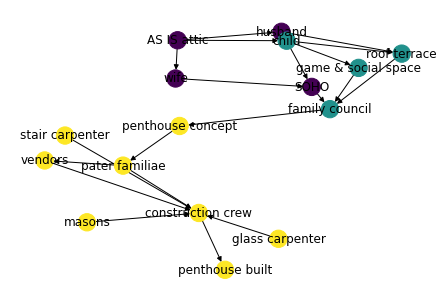

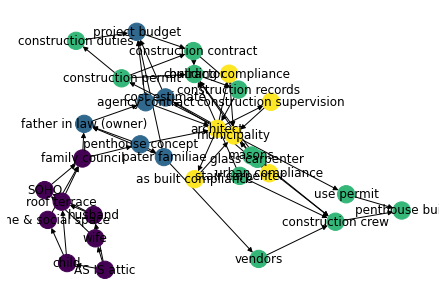

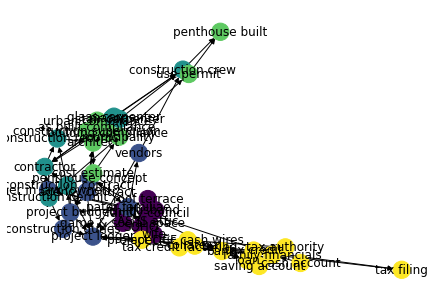

In [5]:
for i in range (len(list_net)):
  nx.draw(list_net[i], node_color = list(lista_partizioni[i].values()), with_labels=True)
  plt.show()

#Calcola le metriche del network

In [6]:
list_density = []
list_SH_path = []
list_node_conn = []
list_node_trans = []


In [7]:
for i in list_net:
  Den = nx.density(i)
  sh = nx.average_shortest_path_length(i)
  conn = nx.average_node_connectivity(i)
  #trans = nx.transitivity(1) # only for undirected
  list_density.append(Den)
  list_SH_path.append(sh)
  list_node_conn.append(conn)
  #list_node_trans.append(trans)

In [8]:
report = pd.DataFrame(list_density, columns=['Density'])
report['Shortest_path'] = list_SH_path
report['Node_conn']= list_node_conn

In [9]:
report

,Density,Shortest_path,Node_conn
0,0.083333,0.895833,0.337500
1,0.053427,1.940524,0.549395
2,0.040909,1.625253,0.447980


In [10]:
report_delta = report/report.shift(1)-1

In [11]:
report_delta

,Density,Shortest_path,Node_conn
0,NaN,NaN,NaN
1,-0.358871,1.166167,0.627838
2,-0.234305,-0.162467,-0.184595


# Calcola le metriche relative ai singoli nodi (per ora degree e betweness centrality)

Degree

In [12]:
# calcoliamo la degree per ogni nodo
list_metr_nodes_degree = []
A = 0
for i in list_net:
  colonna = ("G"+str(A)+"_Degree")
  nodi = pd.DataFrame()
  nodi = pd.DataFrame((nx.degree(i)), columns = ['Nodes', colonna])
  nodi = nodi.set_index(['Nodes'], drop=True)
  nodi[colonna]=nodi[colonna]/nodi[colonna].sum() #normalizziamo il grado
  
  list_metr_nodes_degree.append(nodi)
  A = A+1


a

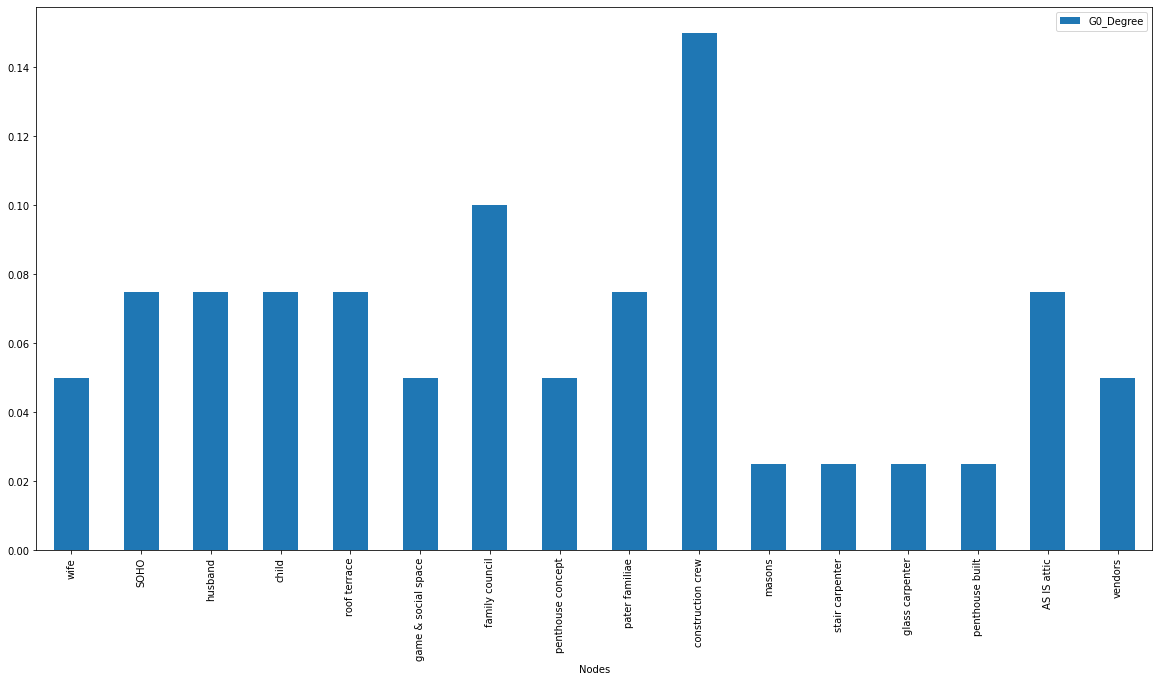

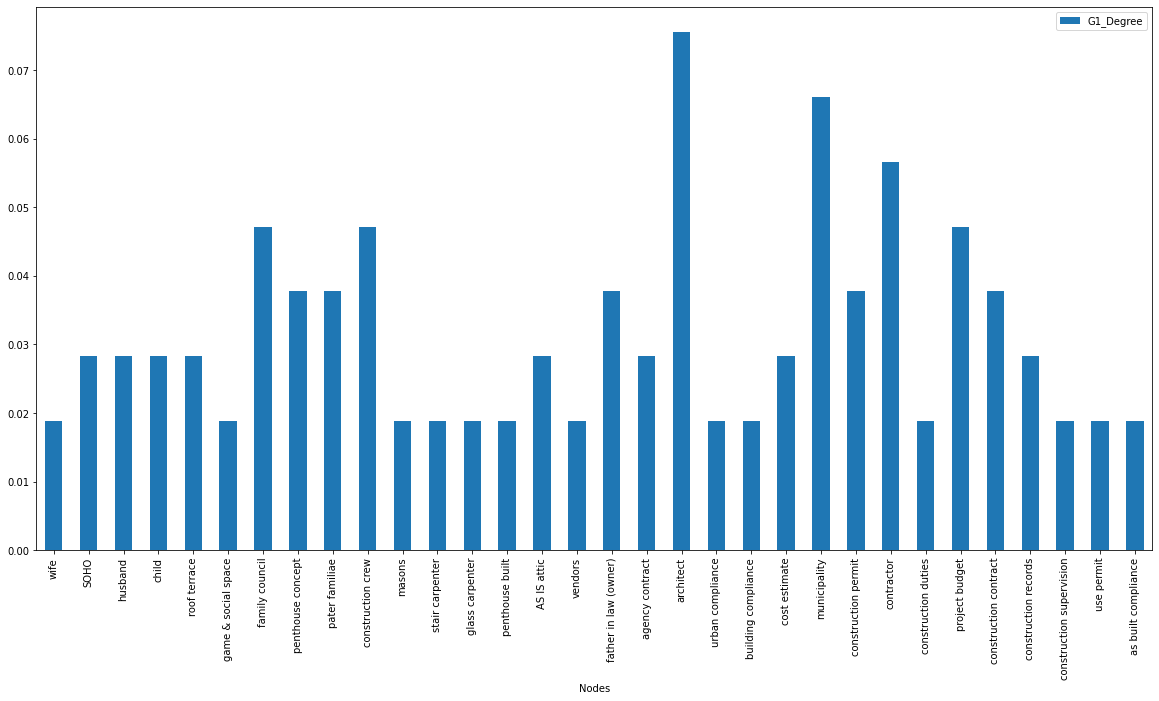

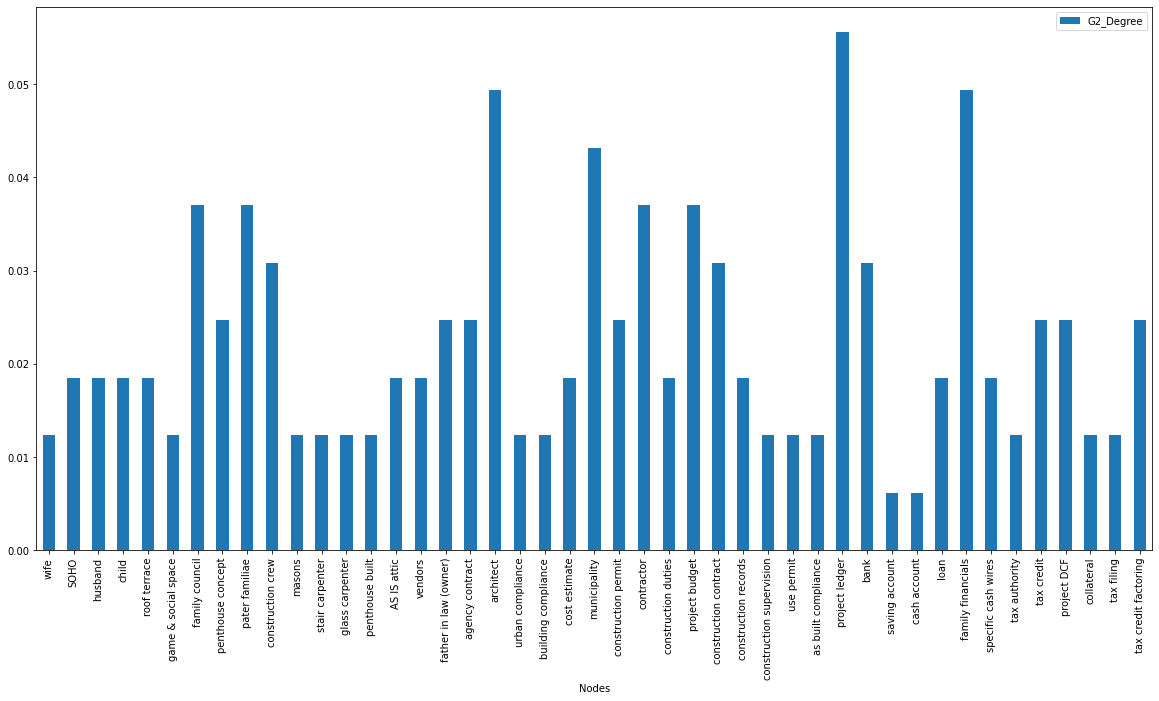

In [13]:
#plottiamo la degree dei singoli nodi
for i in range (3):
  list_metr_nodes_degree[i].plot(kind='bar',figsize=(20,10))

Plottiamo la distribuzione normalizzata della degree

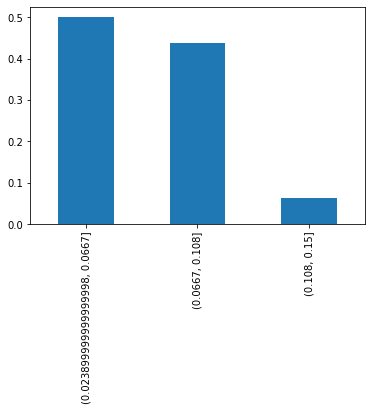

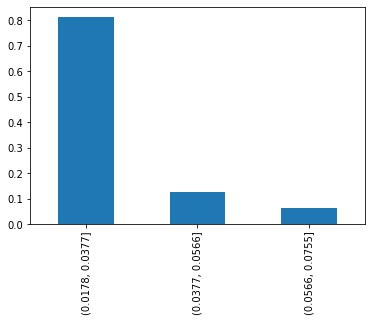

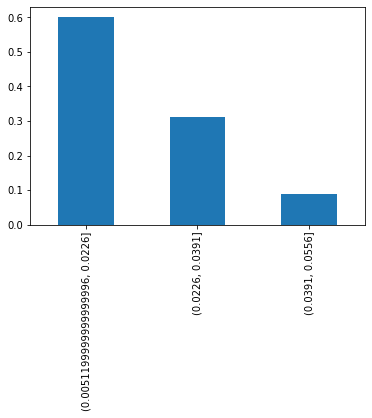

In [14]:
#plottiamo la distribuzione normalizzata con istogrammi

for i in range (3):
  colonna = ("G"+str(i)+"_Degree")
  list_metr_nodes_degree[i][colonna].value_counts(normalize = True, bins = 3).plot(kind='bar')
  plt.show()
  

Confrontiamo la degree dei nodi PERMANENTI nelle 3 fasi del progetto

Text(0.5, 1.0, 'confronto degree nodi nella 3 fasi normalizzata (solo nodi costanti')

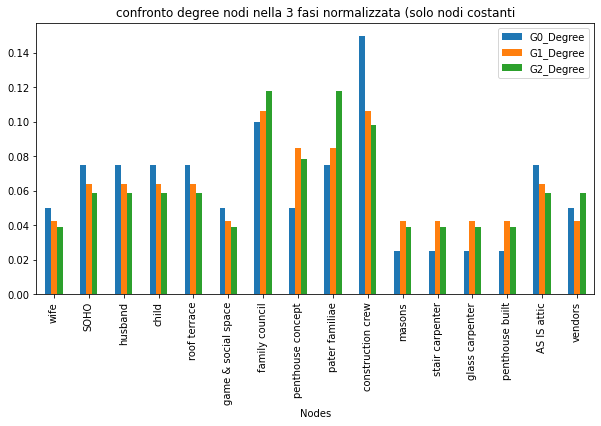

In [15]:
#uniamo i DF per vedere come cambia la degree del nodo nelle tre fasi
mappa_degree = list_metr_nodes_degree[0]
for i in range (1,3):
  
  mappa_degree = mappa_degree.join(list_metr_nodes_degree[i])

mappa_degree = mappa_degree/mappa_degree.sum()


mappa_degree.plot(kind='bar', figsize=(10,5))
plt.title("confronto degree nodi nella 3 fasi normalizzata (solo nodi costanti")


Centrality

In [16]:
# calcoliamo la centraility per ogni nodo
list_metr_nodes_centrality = []
A = 0
for i in list_net:
  
  colonna = ("G"+str(A)+"_B_centrality")
  nodi = pd.DataFrame(nx.betweenness_centrality(i).values(), index= nx.betweenness_centrality(i).keys(), columns=[colonna])
  list_metr_nodes_centrality.append(nodi)
  A = A+1


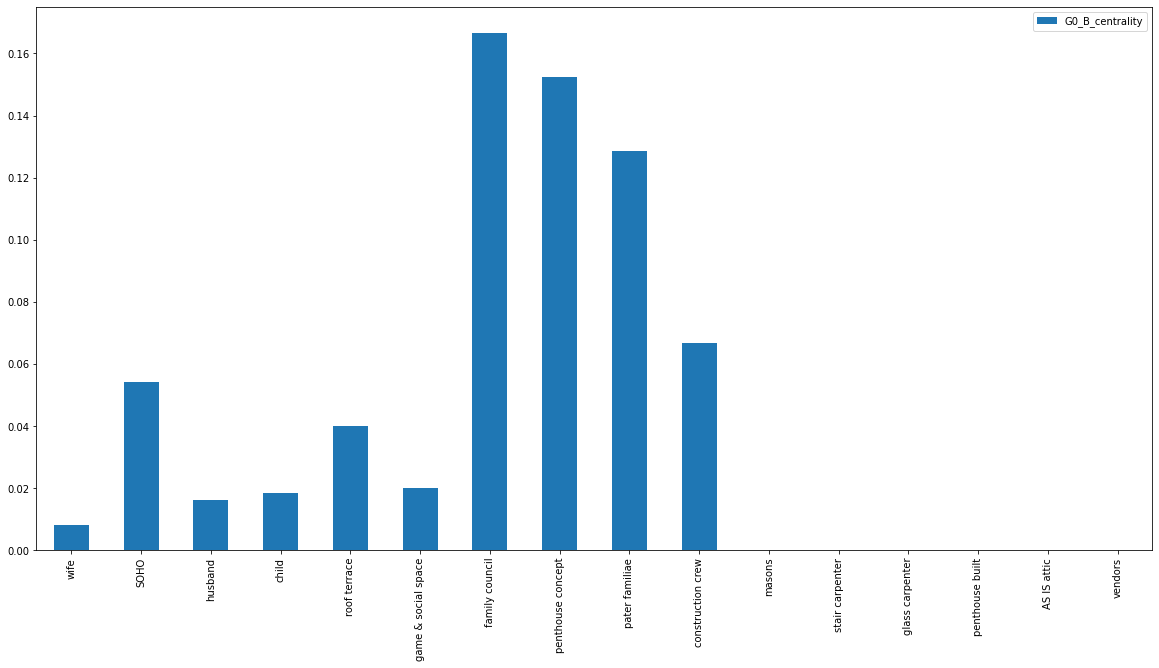

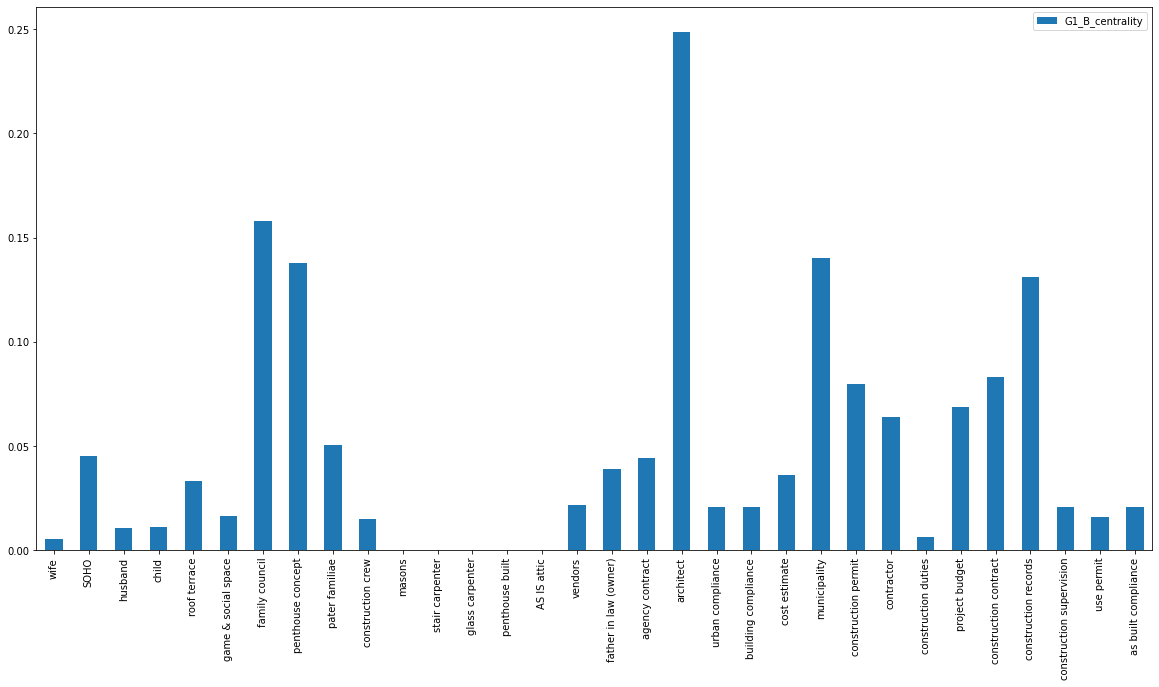

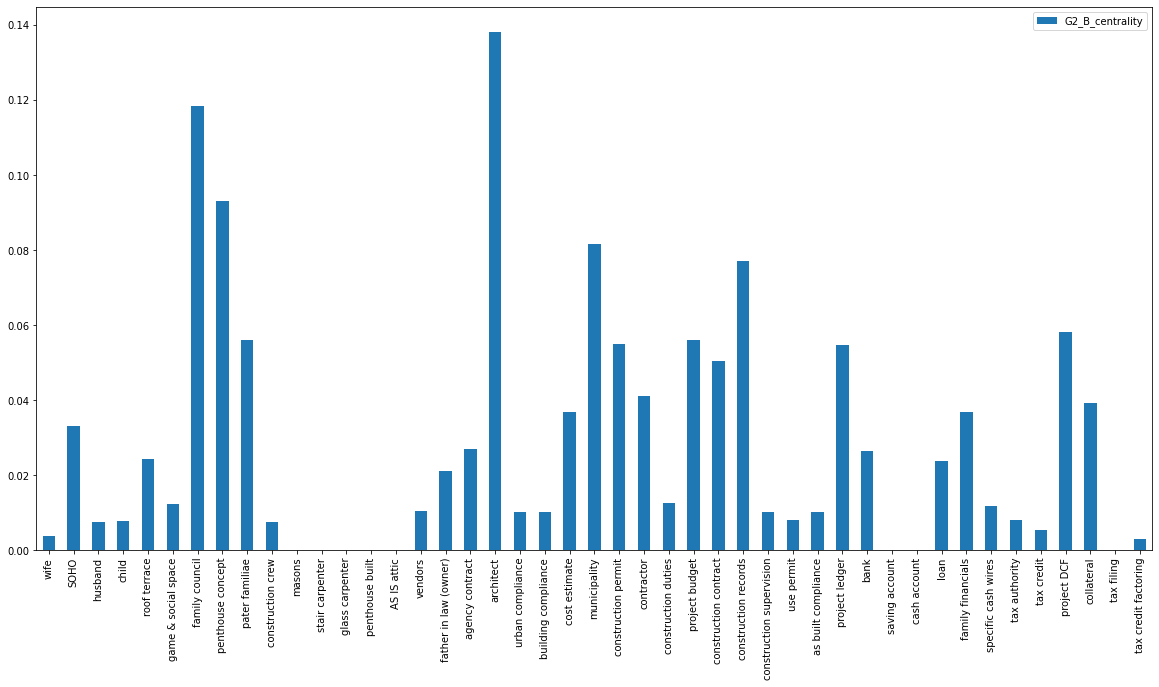

In [17]:
#plottiamo la centrality dei singoli nodi
for i in range (3):
  list_metr_nodes_centrality[i].plot(kind='bar',figsize=(20,10))

Plottiamo la distribuzione normalizzata della Centrality

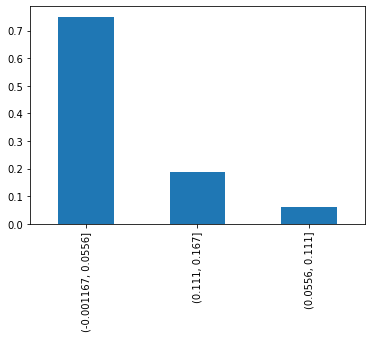

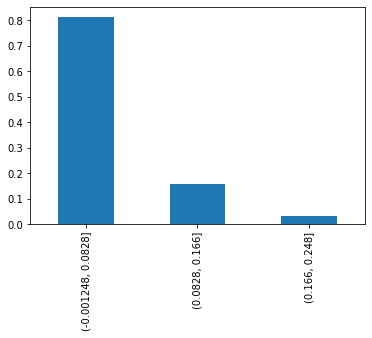

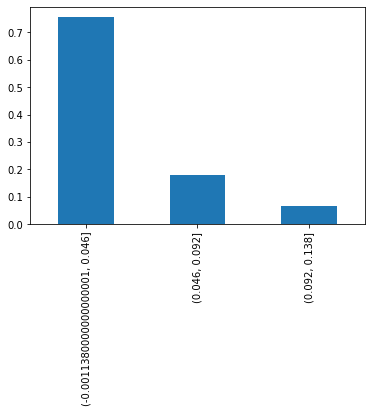

In [18]:
#plottiamo la distribuzione normalizzata con istogrammi
for i in range (3):
  colonna = ("G"+str(i)+"_B_centrality")
  list_metr_nodes_centrality[i][colonna].value_counts(normalize = True, bins = 3).plot(kind='bar')
  plt.show()

Confrontiamo la centrality dei nodi PERMANENTI nelle 3 fasi del progetto

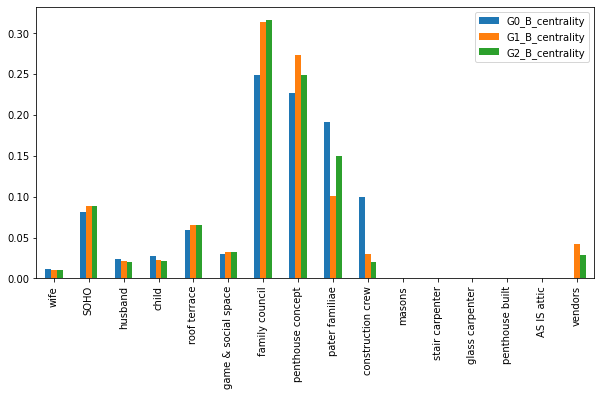

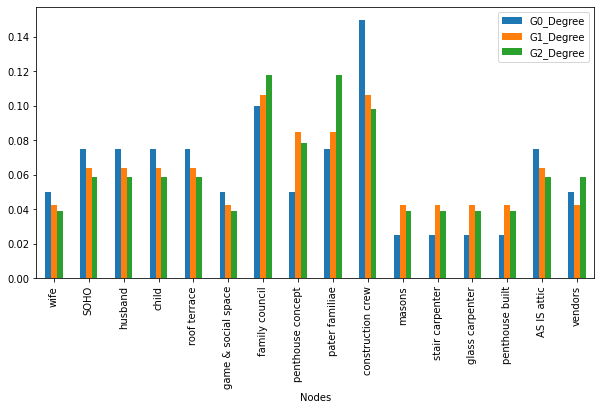

In [19]:
#uniamo i DF per vedere come cambia la centralità del nodo nelle tre fasi
mappa_centrality = list_metr_nodes_centrality[0]
for i in range (1,3):
  mappa_centrality = mappa_centrality.join(list_metr_nodes_centrality[i])

mappa_centrality = mappa_centrality/mappa_centrality.sum()

mappa_centrality.plot(kind='bar', figsize = (10,5))
mappa_degree.plot(kind='bar', figsize=(10,5))

#disegna più grande per leggibilità

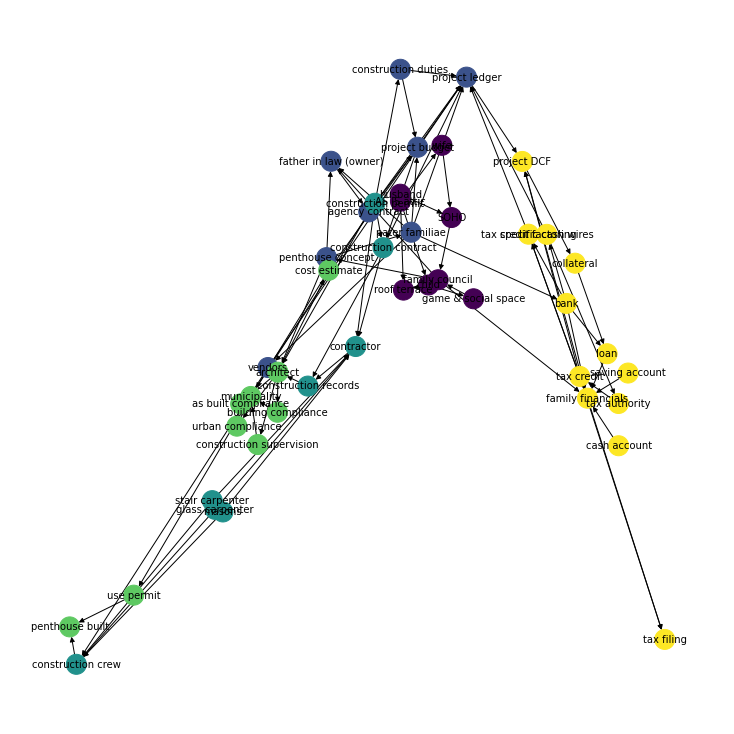

In [20]:
plt.figure(figsize=(10,10))
nx.draw(G2, node_color = list(lista_partizioni[2].values()), with_labels=True, font_size=10, node_size=400)